In [1]:
import torch
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *

/home/rocky/environments/train_pytorch/lib64/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


In [2]:
import networkx as nx
import numpy as np
def get_bad_mat(n=10,p=0.15,show_graph=0,seed=42,verbose=1):
    # 生成稀疏随机矩阵，保证强连通
    M = np.zeros((n, n))
    cnt=0
    np.random.seed(seed)
    while not nx.is_strongly_connected(nx.DiGraph(M)):
        M = np.random.choice([0, 1], size=(n, n), p=[1-p, p])
        cnt=cnt+1
        if cnt>1000000:
            raise Exception("1000000次都没找到合适的矩阵")
    if verbose==1:
        print('用了'+str(cnt)+'次找到')
    # 归一化每列元素，使得每列元素之和为1
    col_sums = np.sum(M, axis=0)
    M = M / col_sums

    # 将矩阵转换成有向图，并绘制出该图
    if show_graph==1:
        G = nx.DiGraph(M)
        nx.draw(G, with_labels=True)
        plt.show()
        diameter = nx.algorithms.distance_measures.diameter(G)
        print(f"图的直径为{diameter}")
    return M

In [3]:
n=5
d=784
I=np.eye(n)
A=get_xinmeng_matrix(n=n).T 
A=0.9*A+0.1*I
B=get_B(A=A,u=2*n,n=n)
epochs=400

Training Progress: 100%|██████████| 400/400 [00:38<00:00, 10.31it/s, accuracy=97.5397973951%, epoch=400, loss=0.0660519250]


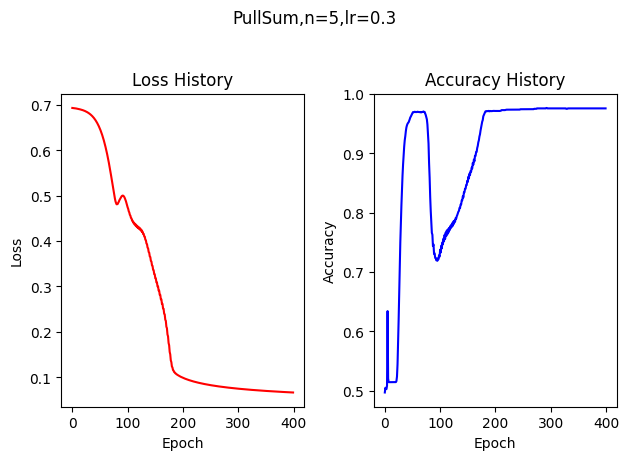

Training Progress: 100%|██████████| 400/400 [00:39<00:00, 10.14it/s, accuracy=97.3950795948%, epoch=400, loss=0.0938086212]


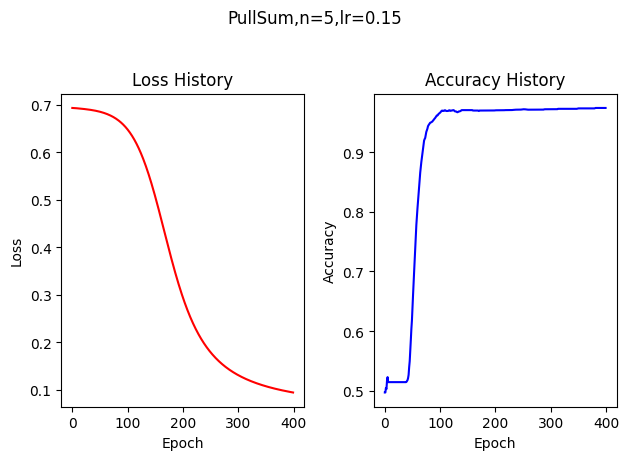

Training Progress: 100%|██████████| 400/400 [00:39<00:00, 10.21it/s, accuracy=97.1056439942%, epoch=400, loss=0.1587460995]


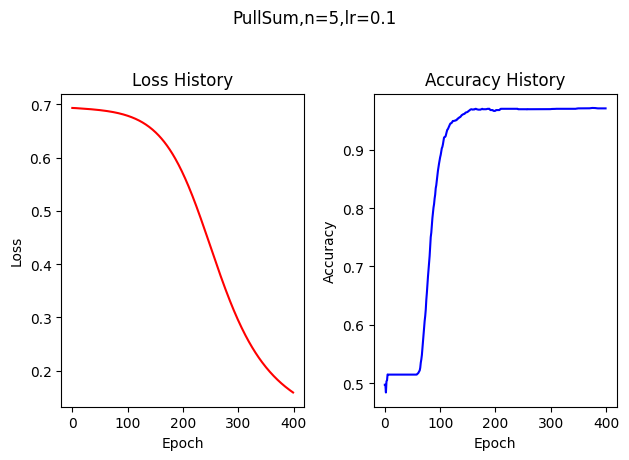

In [5]:
l1,a1=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.3/n))
l2,a2=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.15/n)) 
l3,a3=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.1/n)) 

Training Progress: 100%|██████████| 400/400 [00:40<00:00,  9.96it/s, accuracy=97.5397973951%, epoch=400, loss=0.0764001727]


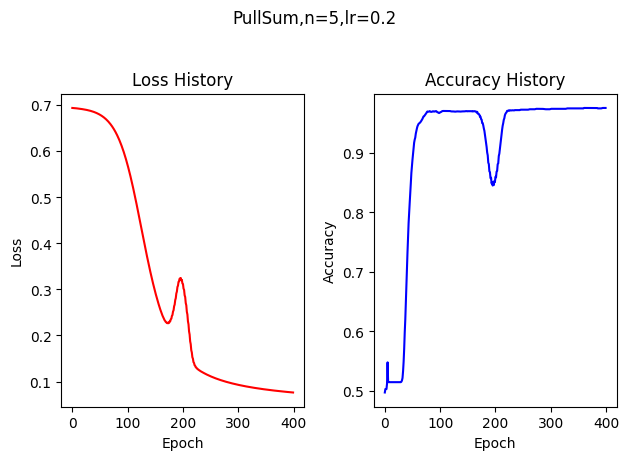

In [4]:
l4,a4=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.2/n)) 

Training Progress: 100%|██████████| 400/400 [00:39<00:00, 10.10it/s, accuracy=50.2894356006%, epoch=400, loss=0.7957450628]


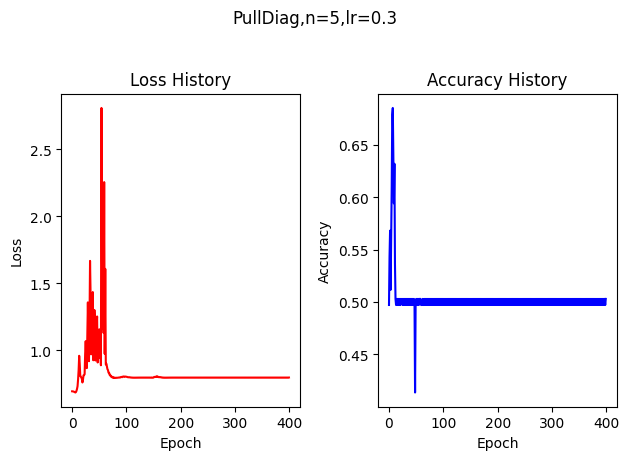

Training Progress: 100%|██████████| 400/400 [00:39<00:00, 10.14it/s, accuracy=97.8292329957%, epoch=400, loss=0.0572192334]


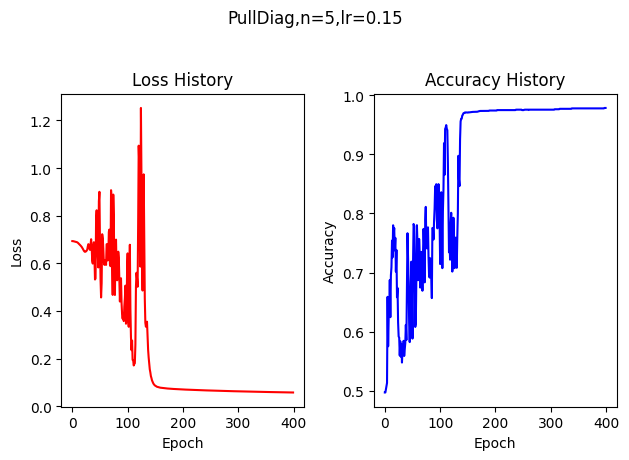

Training Progress: 100%|██████████| 400/400 [00:39<00:00, 10.16it/s, accuracy=97.7568740955%, epoch=400, loss=0.0596047424]


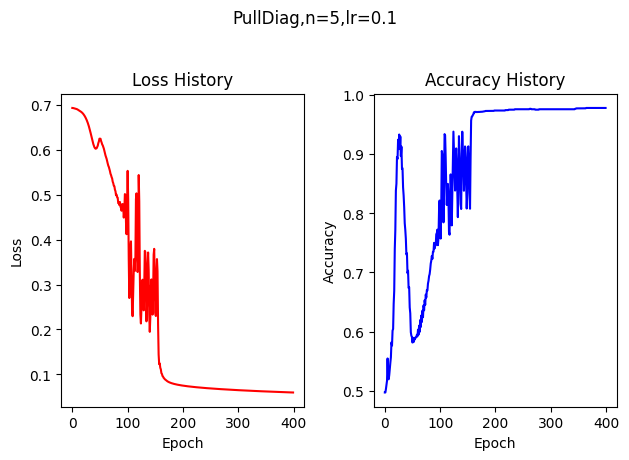

In [6]:
L1,A1=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=0.3)
L2,A2=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=0.15) 
L3,A3=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=0.1) 

Training Progress: 100%|██████████| 400/400 [00:39<00:00, 10.15it/s, accuracy=97.5397973951%, epoch=400, loss=0.0697355673]


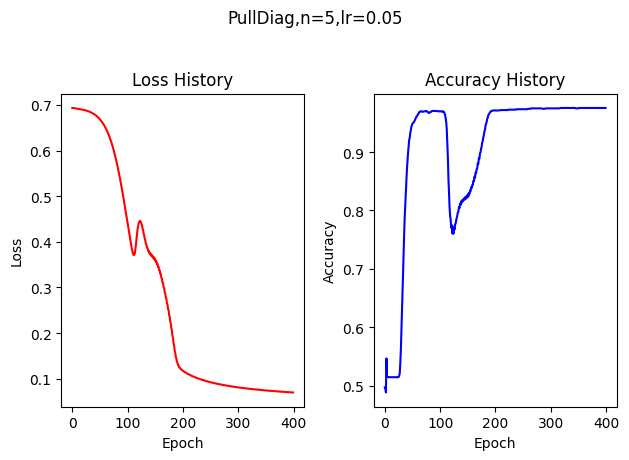

Training Progress: 100%|██████████| 400/400 [00:39<00:00, 10.19it/s, accuracy=97.5397973951%, epoch=400, loss=0.0765041828]


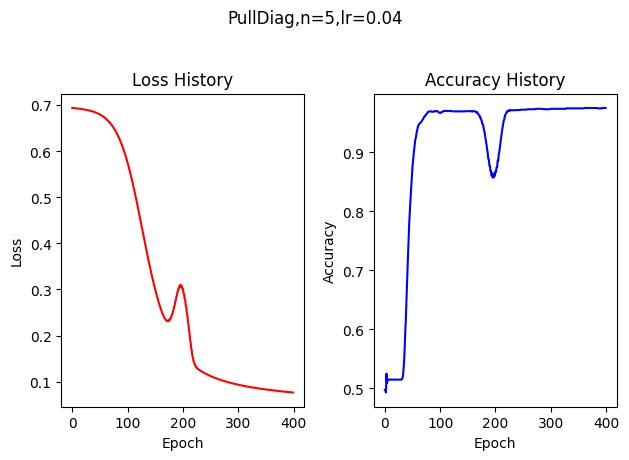

Training Progress: 100%|██████████| 400/400 [00:39<00:00, 10.04it/s, accuracy=97.1056439942%, epoch=400, loss=0.1597046822]


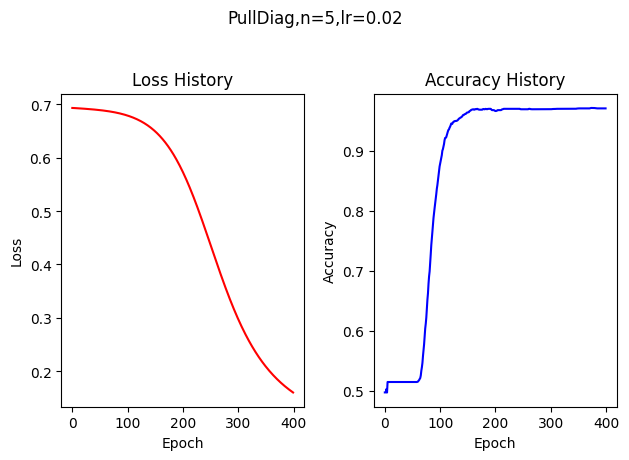

In [7]:
L4,A4=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=5e-2)
L5,A5=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=4e-2)
L6,A6=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=2e-2) 

Training Progress: 100%|██████████| 400/400 [00:43<00:00,  9.10it/s, accuracy=97.3950795948%, epoch=400, loss=0.0940588593]


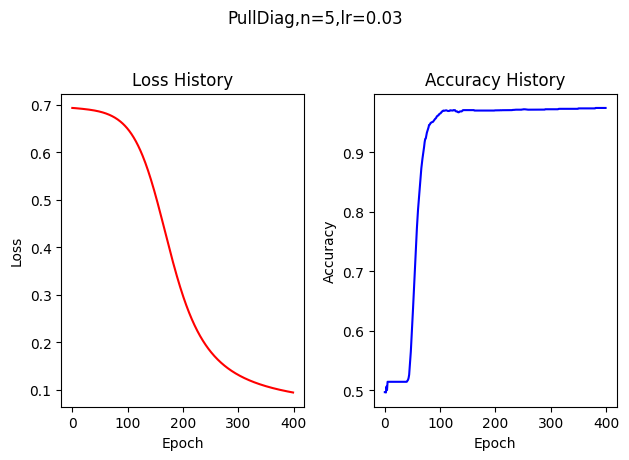

In [13]:
L7,A7=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=3e-2) 

Sum 之所以不取更大的lr（for Sum），是因为更大的lr也会使Sum震荡，反而在accuracy表现上不如较小的lr

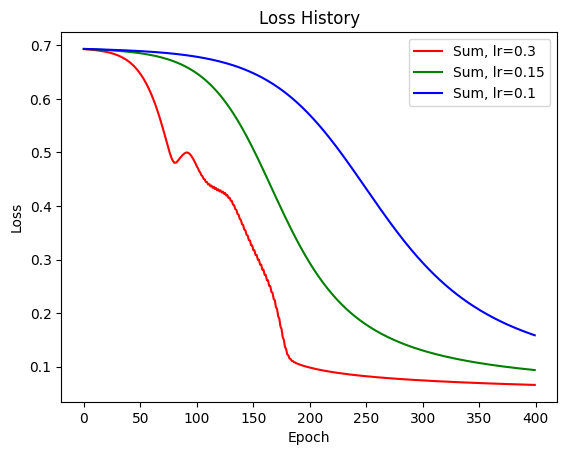

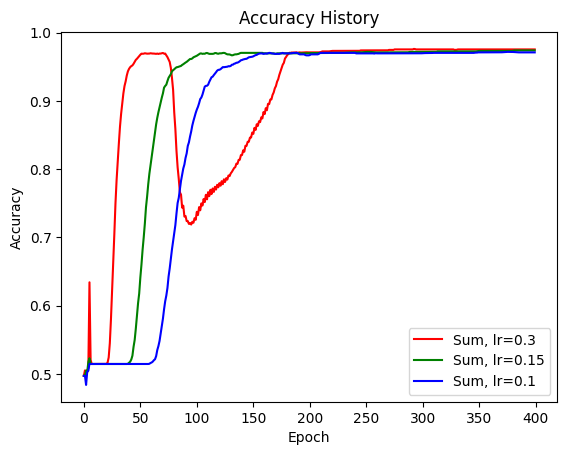

In [9]:
plt.plot(l1, color='r',linestyle='-',label='Sum, lr=0.3')
plt.plot(l2, color='g',linestyle='-',label='Sum, lr=0.15')
plt.plot(l3, color='b',linestyle='-',label='Sum, lr=0.1')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(a1, color='r',linestyle='-',label='Sum, lr=0.3')
plt.plot(a2, color='g',linestyle='-',label='Sum, lr=0.15')
plt.plot(a3, color='b',linestyle='-',label='Sum, lr=0.1')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

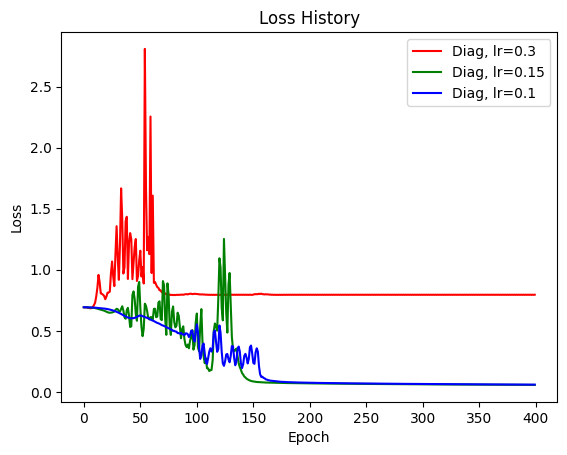

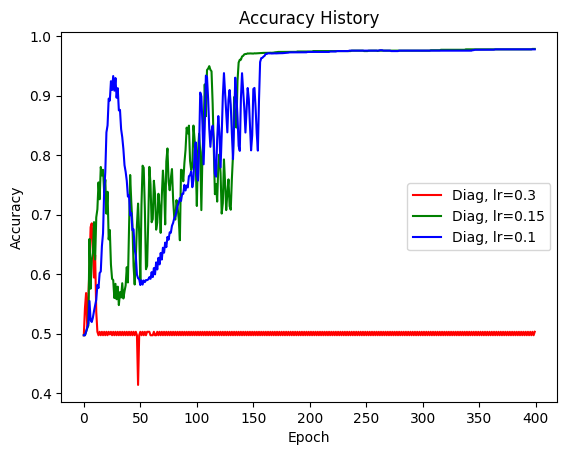

In [10]:
plt.plot(L1, color='r',linestyle='-',label='Diag, lr=0.3')
plt.plot(L2, color='g',linestyle='-',label='Diag, lr=0.15')
plt.plot(L3, color='b',linestyle='-',label='Diag, lr=0.1')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(A1, color='r',linestyle='-',label='Diag, lr=0.3')
plt.plot(A2, color='g',linestyle='-',label='Diag, lr=0.15')
plt.plot(A3, color='b',linestyle='-',label='Diag, lr=0.1')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

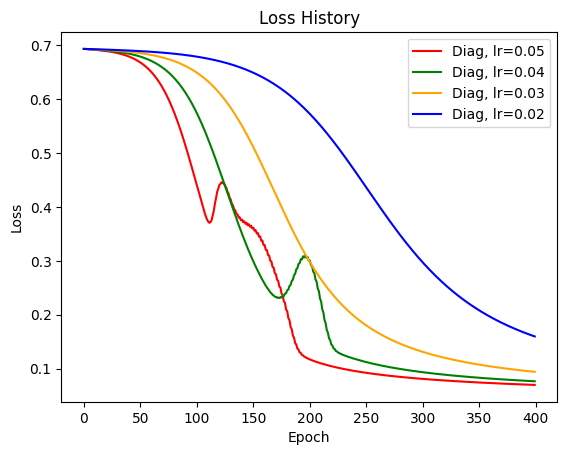

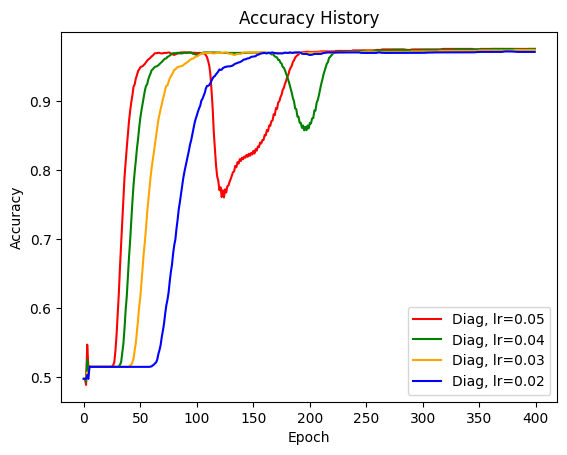

In [14]:
plt.plot(L4, color='r',linestyle='-',label='Diag, lr=0.05')
plt.plot(L5, color='g',linestyle='-',label='Diag, lr=0.04')
plt.plot(L7, color='orange',linestyle='-',label='Diag, lr=0.03')
plt.plot(L6, color='b',linestyle='-',label='Diag, lr=0.02')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(A4, color='r',linestyle='-',label='Diag, lr=0.05')
plt.plot(A5, color='g',linestyle='-',label='Diag, lr=0.04')
plt.plot(A7, color='orange',linestyle='-',label='Diag, lr=0.03')
plt.plot(A6, color='b',linestyle='-',label='Diag, lr=0.02')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1. loss的收敛速度能局部反映出acuuracy的变换，但不完全——例如 “绿色虚线”虽然loss下降快，但accuracy表现不好. 有可能真实数据在神经网络上的实验，只放accuracy？

2. 取学习率小到Sum and Diag都不会产生震荡之后, 被n倍学习率补偿后的Sum和Diag差不多

3. Sum 之所以不取更大的lr（for Sum），是因为更大的lr也会使Sum震荡，反而在accuracy表现上不如较小的lr

4. <font color=red>还不够好，比如说lr=0.03的Diag就没有震荡，和lr=0.15的Sum基本一样————不过图片最能说明的是，Sum能容忍更大的学习率</font>

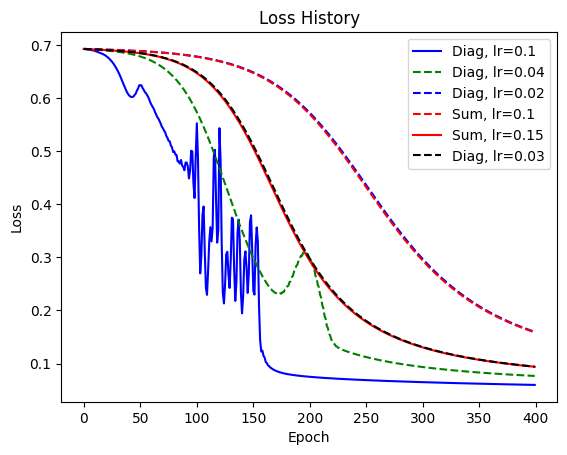

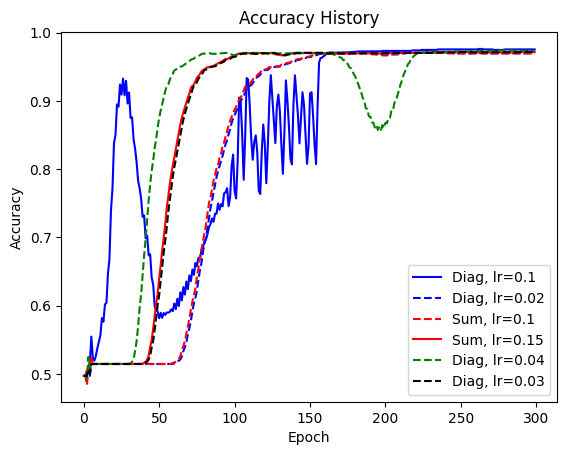

In [19]:
plt.plot(L3, color='b',linestyle='-',label='Diag, lr=0.1')
plt.plot(L5, color='g',linestyle='--',label='Diag, lr=0.04')
plt.plot(L6, color='b',linestyle='--',label='Diag, lr=0.02')
plt.plot(l3, color='r',linestyle='--',label='Sum, lr=0.1')
plt.plot(l2, color='r',linestyle='-',label='Sum, lr=0.15')
plt.plot(L7, color='black',linestyle='--',label='Diag, lr=0.03')
#plt.plot(l6, color='r',linestyle='--',label='Sum, lr=0.02')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(A3[:300], color='b',linestyle='-',label='Diag, lr=0.1')
plt.plot(A6[:300], color='b',linestyle='--',label='Diag, lr=0.02')
plt.plot(a3[:300], color='r',linestyle='--',label='Sum, lr=0.1')
plt.plot(a2[:300], color='r',linestyle='-',label='Sum, lr=0.15')
plt.plot(A5[:300], color='g',linestyle='--',label='Diag, lr=0.04')
plt.plot(A7[:300], color='black',linestyle='--',label='Diag, lr=0.03')
#plt.plot(l6, color='r',linestyle='--',label='Sum, lr=0.02')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()